In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, get_scorer

In [ ]:
df = pd.read_csv(r"..\oblig3\student_performance.csv", delimiter=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [44]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [55]:
pd.set_option('display.max_columns', None)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [53]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [49]:
df_features = pd.DataFrame(StandardScaler().fit_transform(df.drop("Target", axis=1)), columns=df.drop("Target", axis=1).columns)
df_targets = pd.Series(LabelEncoder().fit_transform(df['Target']))

In [50]:
df_targets.head(5)

0    0
1    2
2    0
3    2
4    2
dtype: int64

C:\Users\hallo\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


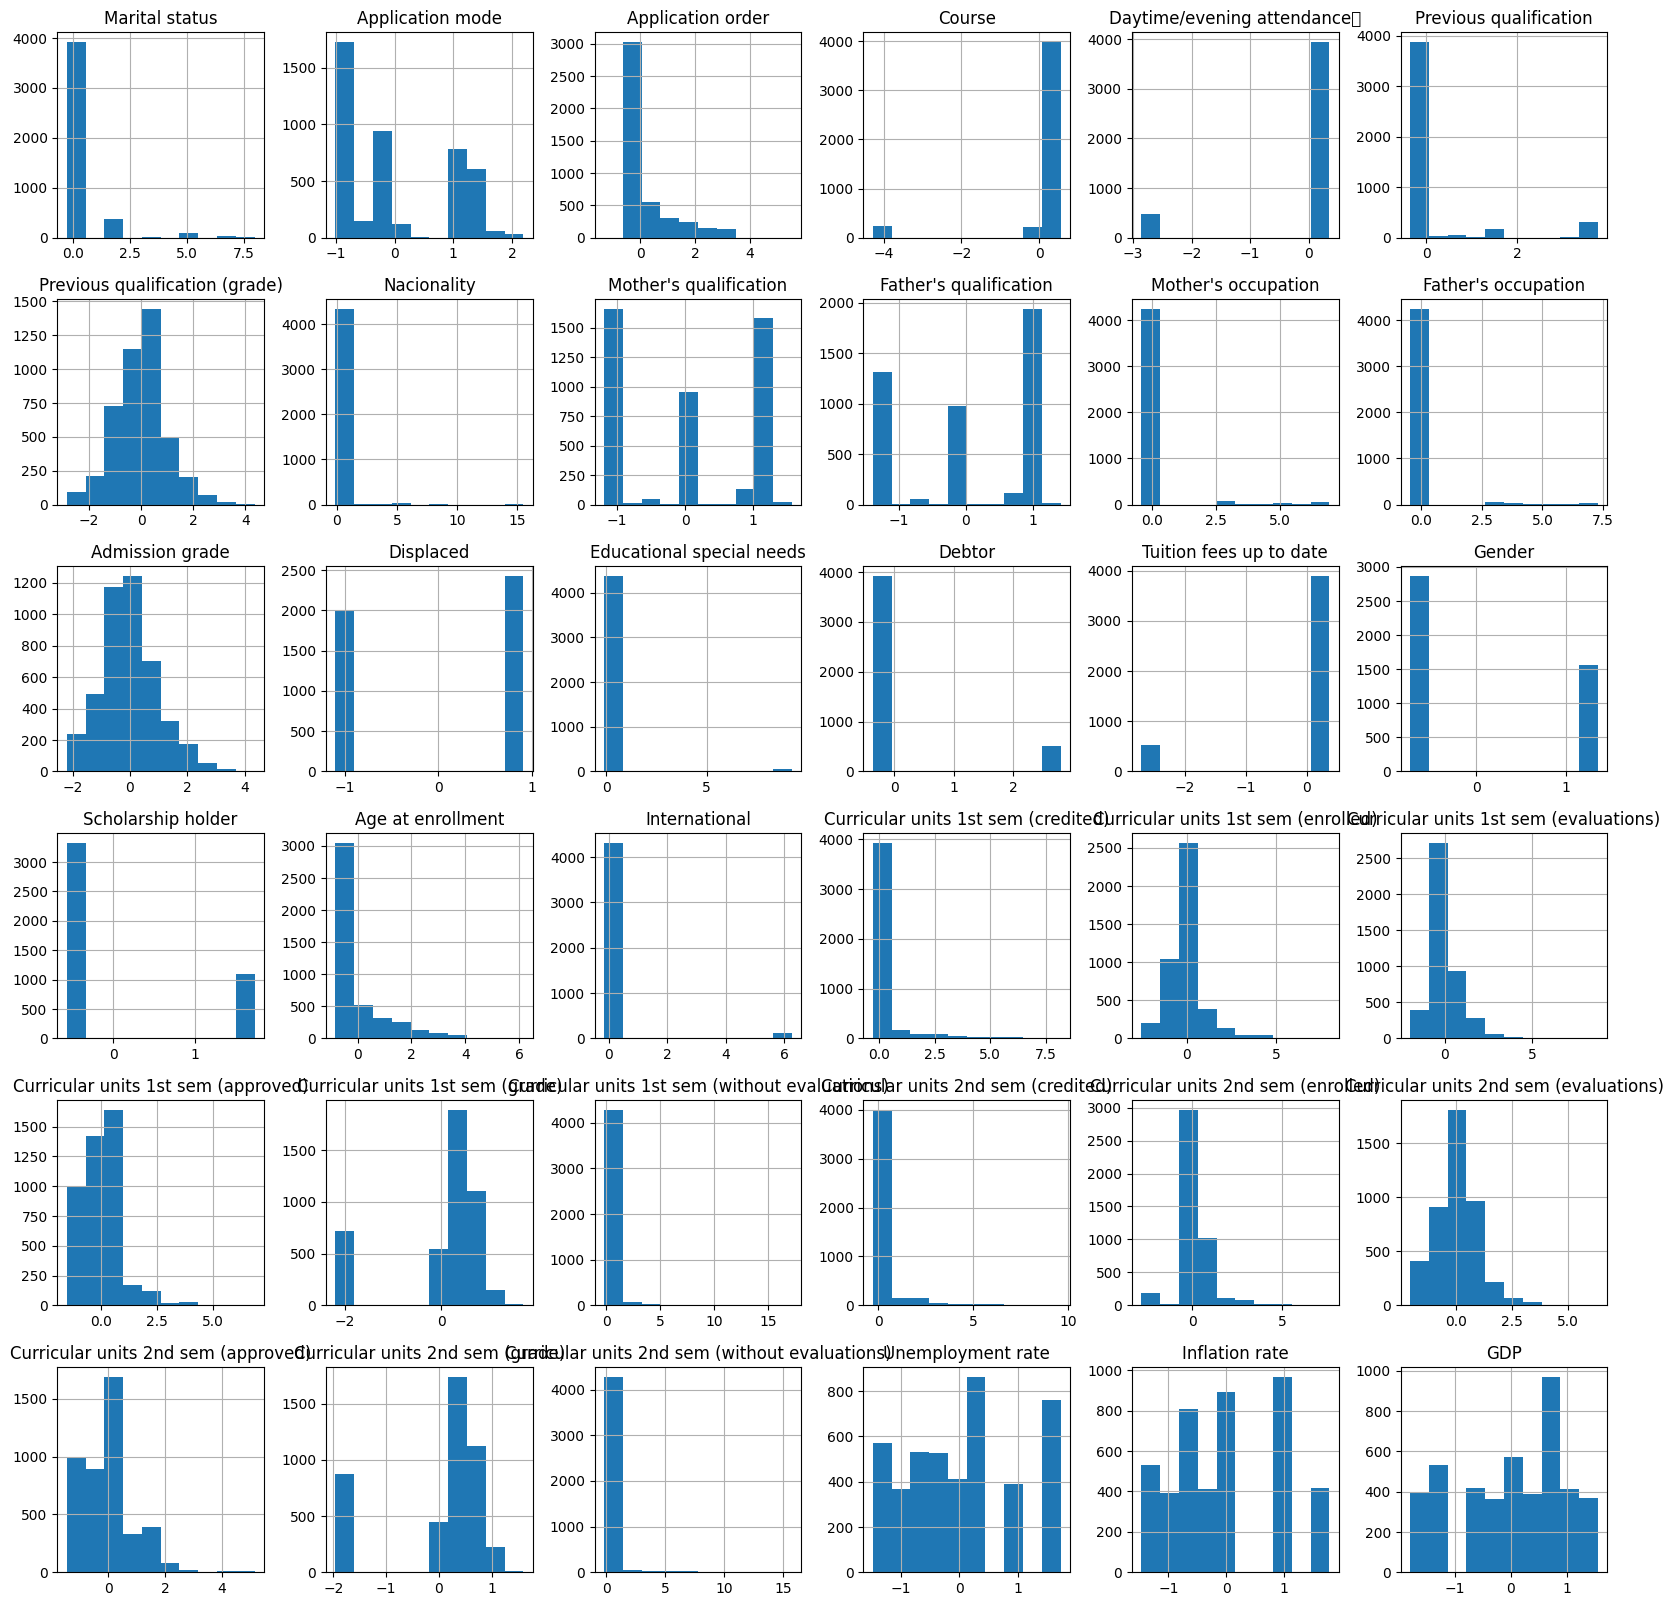

In [ ]:
df_features.hist(figsize=(20,20))
plt.show()

c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

C:\Users\hallo\AppData\Roaming\Python\Python314\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\hallo\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


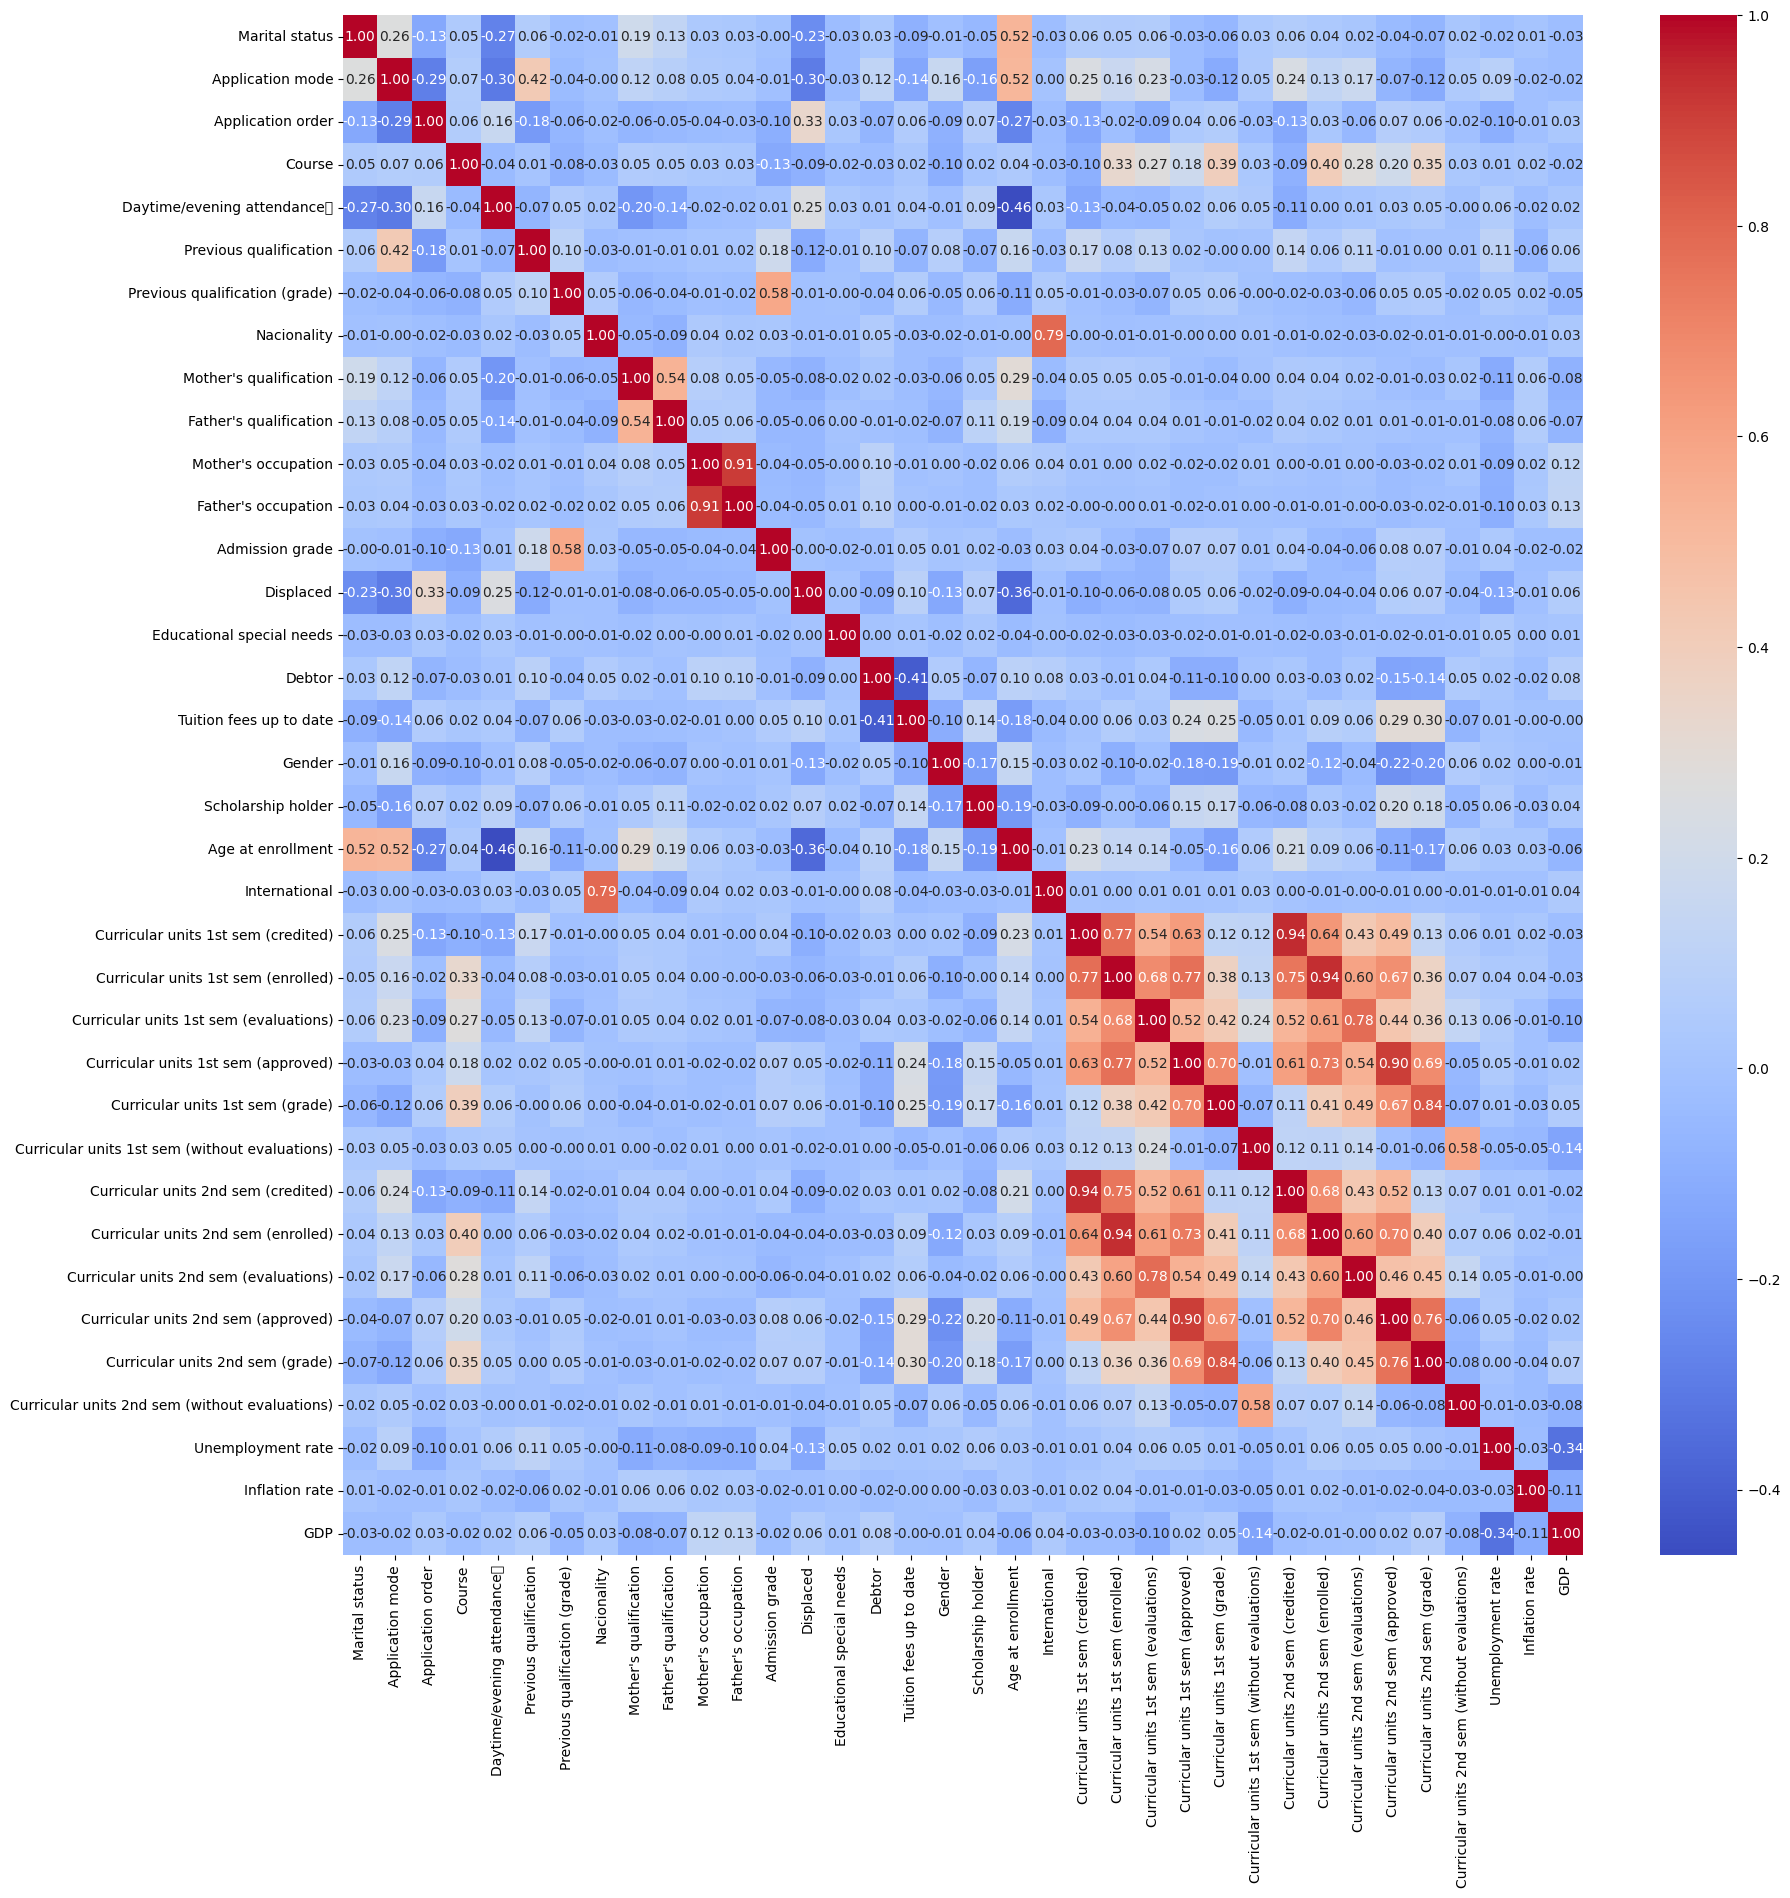

In [69]:
df_correlation = df_features.corr()
plt.figure(figsize=(20,20))
sb.heatmap(df_correlation, annot=True, cmap="coolwarm", fmt=".2f")

C:\Users\hallo\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


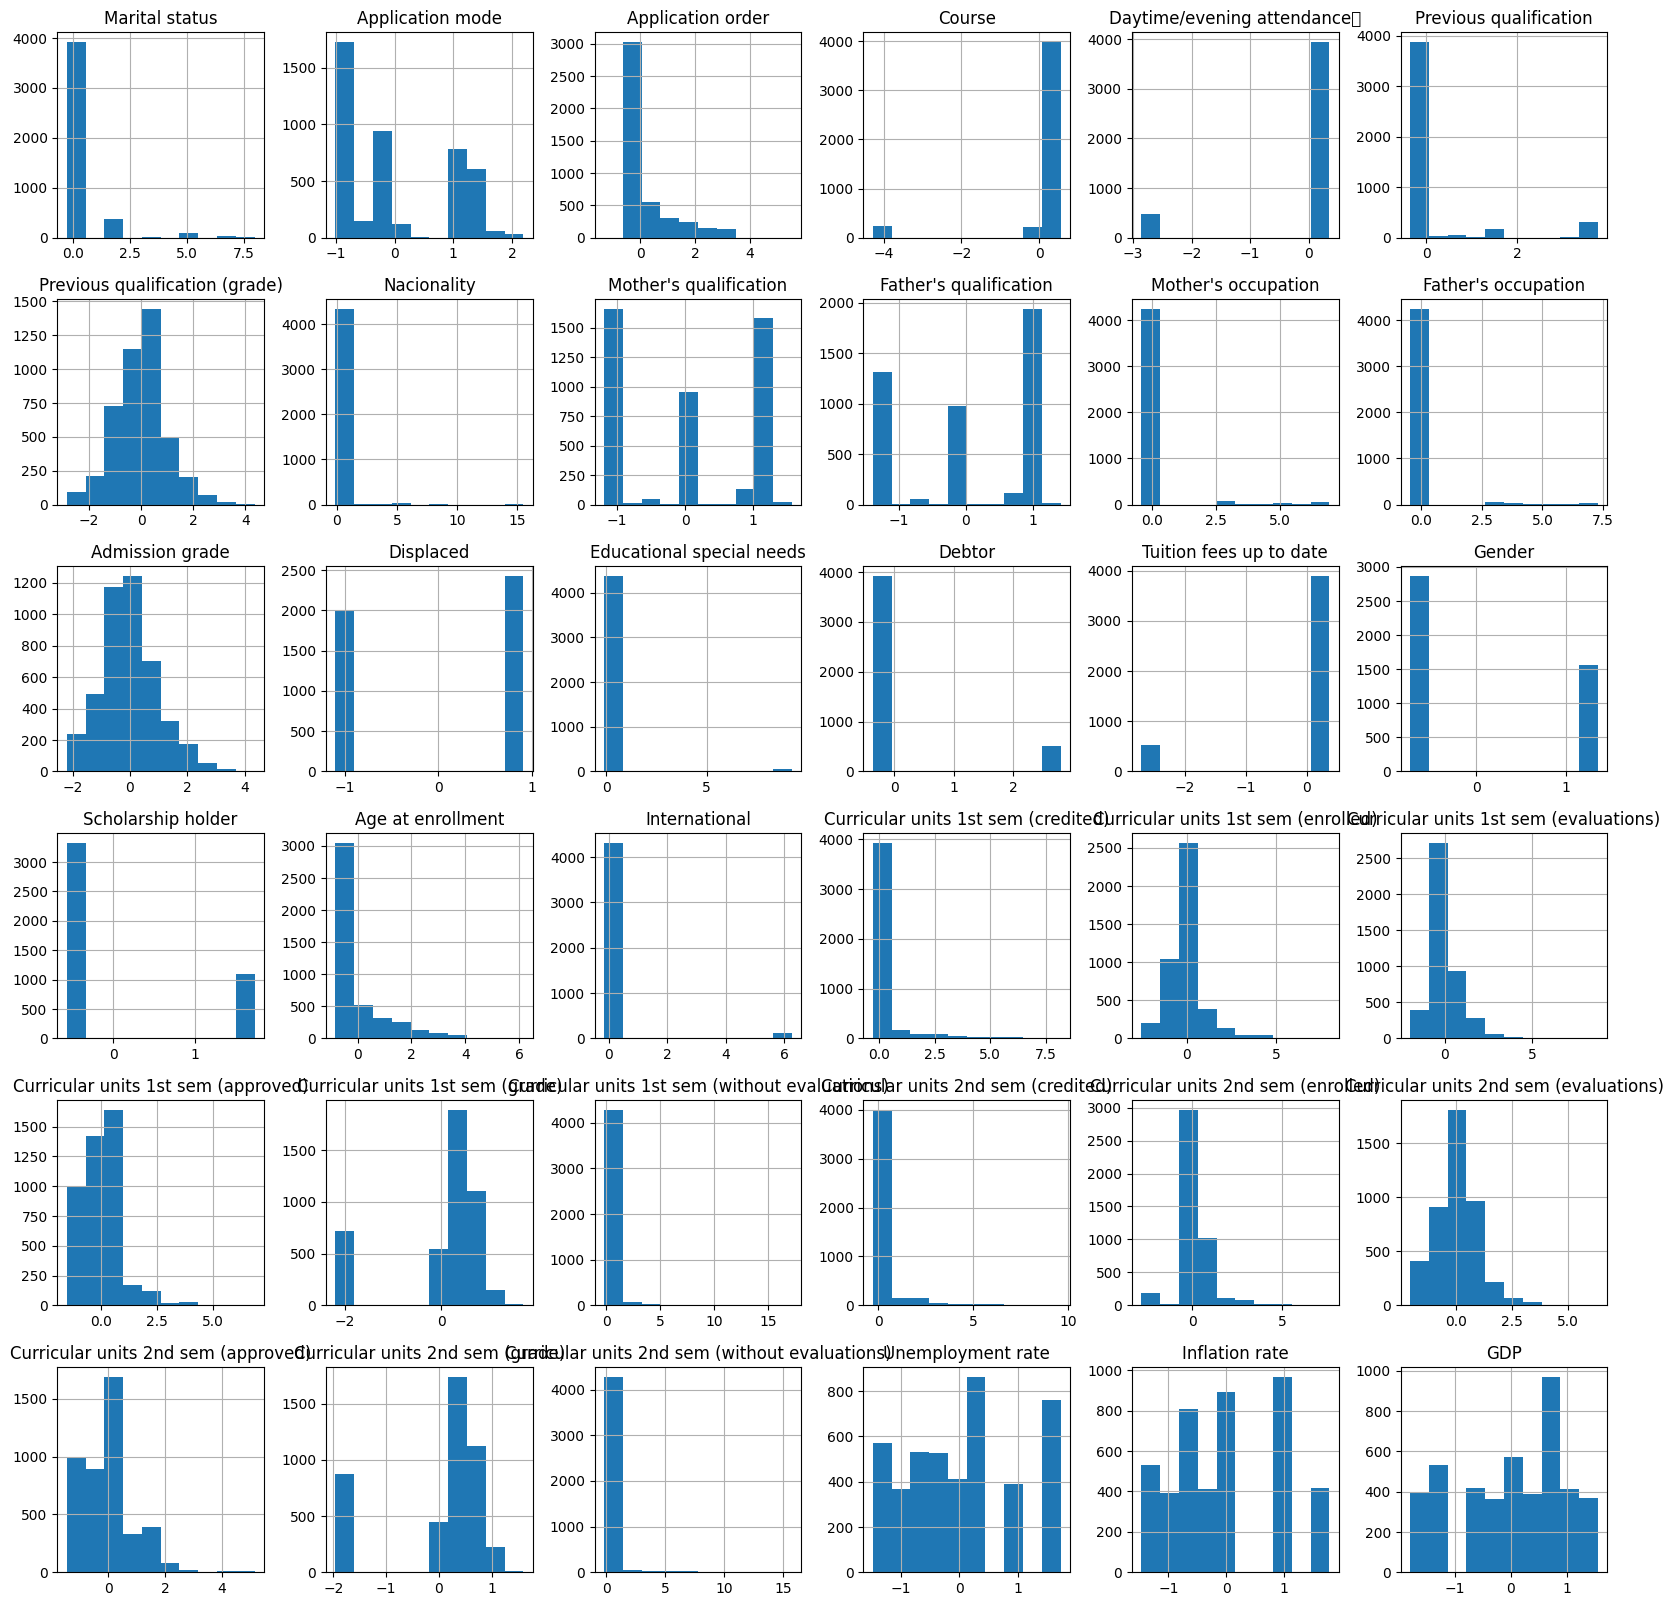

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


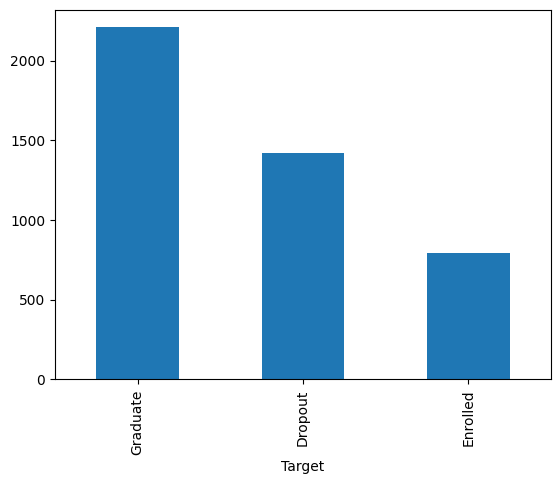

In [9]:
df['Target'].value_counts().plot.bar()
print(df['Target'].value_counts())

In [10]:
global_random_state = 15

scoring = {
    'accuracy': get_scorer('accuracy'),
    'precision': make_scorer(precision_score, average='macro', zero_division=1.0),
    'recall': make_scorer(recall_score, average='macro', zero_division=1.0),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', average='macro', response_method='predict_proba')   
}

In [11]:
def evaluate(estimator, X, y):
    scores = {}
    for (name,scorer) in scoring.items():
        scores[name] = scorer(estimator, X, y) 
    return scores

In [ ]:
def train(features, targets, estimator, params, scoring=scoring, refit='f1', random_state=global_random_state, outer_splits=5, inner_splits=4):

    outer_cv = StratifiedKFold(n_splits=outer_splits, shuffle=True, random_state=global_random_state)
    inner_cv = StratifiedKFold(n_splits=inner_splits, shuffle=True, random_state=global_random_state)

    scores_train = []
    scores_test = []
    estimators = []
    cv_results = []

    # Loop through all test folds
    for (train_index, test_index) in outer_cv.split(features, targets):
        
        grid = GridSearchCV(
            estimator,
            params, 
            scoring=scoring, 
            refit=refit,
            error_score='raise', 
            cv=inner_cv)
        grid.fit(features.iloc[train_index], targets.iloc[train_index])        
        
        evaluation_train = evaluate(grid, features.iloc[train_index], targets.iloc[train_index])
        evaluation_test = evaluate(grid, features.iloc[test_index], targets.iloc[test_index])
        
        scores_train.append(evaluation_train)
        scores_test.append(evaluation_test)
        
        estimators.append(grid.best_estimator_)
        cv_results.append(pd.DataFrame(grid.cv_results_))

    return estimators, pd.DataFrame(scores_train), pd.DataFrame(scores_test), pd.concat(cv_results, names=['test_split'], keys=range(outer_splits))

In [21]:
df_features.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [27]:
df_targets.head()

0    0
1    2
2    0
3    2
4    2
dtype: int64

In [28]:
dt_params = {
    'max_depth': [2,3,4],
    'min_samples_split': [2,3,4,5,6],
    'criterion': ['gini', 'entropy', 'log_loss']
}
dt_estimators, dt_scores_train, dt_scores_test, dt_cv_results = train(df_features, df_targets,
    DecisionTreeClassifier(random_state=global_random_state),
    dt_params)

dt_scores_train.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.748587,0.707410,0.667733,0.676758,0.841141
std,0.006513,0.010262,0.013674,0.013391,0.017602
min,0.740605,0.694389,0.644528,0.653504,0.813648
25%,0.745126,0.701640,0.669135,0.679393,0.834214
50%,0.749364,0.708217,0.669293,0.679867,0.847528
75%,0.749647,0.711110,0.677589,0.683707,0.854213
max,0.758192,0.721696,0.678122,0.687321,0.856100


In [34]:
dt_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
test_split                                                                    
0          0        0.006497      0.001500         0.011158        0.001395   
           1        0.005235      0.000265         0.010511        0.000267   
           2        0.005155      0.000010         0.010494        0.000225   
           3        0.005115      0.000126         0.010164        0.000286   
           4        0.005008      0.000023         0.009877        0.000151   
...                      ...           ...              ...             ...   
4          40       0.009351      0.000162         0.010146        0.000149   
           41       0.009177      0.000130         0.010220        0.000374   
           42       0.009274      0.000158         0.010265        0.000201   
           43       0.009199      0.000216         0.010577        0.000787   
           44       0.009215      0.000117         0.009941        0.000113   

              param_criterion  param_max_depth  param_min_samples_split  \
test_split                                                                
0          0             gini                2                        2   
           1             gini                2                        3   
           2             gini                2                        4   
           3             gini                2                        5   
           4             gini                2                        6   
...                       ...              ...                      ...   
4          40        log_loss                4                        2   
           41        log_loss                4                        3   
           42        log_loss                4                        4   
           43        log_loss                4                        5   
           44        log_loss                4                        6   

                                                          params  \
test_split                                                         
0          0   {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
           1   {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
           2   {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
           3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
           4   {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
...                                                          ...   
4          40  {'criterion': 'log_loss', 'max_depth': 4, 'min...   
           41  {'criterion': 'log_loss', 'max_depth': 4, 'min...   
           42  {'criterion': 'log_loss', 'max_depth': 4, 'min...   
           43  {'criterion': 'log_loss', 'max_depth': 4, 'min...   
           44  {'criterion': 'log_loss', 'max_depth': 4, 'min...   

               split0_test_accuracy  split1_test_accuracy  ...  mean_test_f1  \
test_split                                                 ...                 
0          0               0.725424              0.705085  ...      0.577534   
           1               0.725424              0.705085  ...      0.577534   
           2               0.725424              0.705085  ...      0.577534   
           3               0.725424              0.705085  ...      0.577534   
           4               0.725424              0.705085  ...      0.577534   
...                             ...                   ...  ...           ...   
4          40              0.733333              0.735593  ...      0.615611   
           41              0.733333              0.735593  ...      0.615611   
           42              0.733333              0.735593  ...      0.615611   
           43              0.733333              0.735593  ...      0.615611   
           44              0.733333              0.735593  ...      0.615611   

               std_test_f1  rank_test_f1  split0_test_roc_auc  \
test_split          

In [30]:
dt_estimators

[DecisionTreeClassifier(max_depth=3, random_state=15),
 DecisionTreeClassifier(max_depth=3, random_state=15),
 DecisionTreeClassifier(max_depth=4, random_state=15),
 DecisionTreeClassifier(max_depth=4, random_state=15),
 DecisionTreeClassifier(max_depth=4, random_state=15)]

In [15]:
#print(grid.best_score_)

In [16]:
#ConfusionMatrixDisplay.from_estimator(rforest, df_features, df_targets)